# DataSet Import and CleanUp

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv("dataset/airbnb-lisbon.csv",low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147442 entries, 0 to 147441
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   room_id               147442 non-null  int64  
 1   survey_id             64393 non-null   float64
 2   host_id               147442 non-null  int64  
 3   room_type             147434 non-null  object 
 4   country               0 non-null       float64
 5   city                  64393 non-null   object 
 6   borough               0 non-null       float64
 7   neighborhood          147442 non-null  object 
 8   reviews               147442 non-null  int64  
 9   overall_satisfaction  132508 non-null  float64
 10  accommodates          144629 non-null  float64
 11  bedrooms              147294 non-null  float64
 12  bathrooms             0 non-null       float64
 13  price                 147434 non-null  float64
 14  minstay               33804 non-null   float64
 15  

#### Removing unnecessary columns

In [3]:
data = data.drop('room_id',axis=1)
data = data.drop('survey_id',axis=1)
data = data.drop('host_id',axis=1)
data = data.drop('country',axis=1)
data = data.drop('city',axis=1)
data = data.drop('borough',axis=1)
data = data.drop('name',axis=1)
data = data.drop('last_modified',axis=1)
data = data.drop('location',axis=1)
data = data.drop('bathrooms',axis=1)
data = data.drop('latitude',axis=1)
data = data.drop('longitude',axis=1)
data['minstay'] = data['minstay'].fillna(1)
data['overall_satisfaction'] = data['overall_satisfaction'].replace(0.0, np.nan)
data = data.dropna()
data.head()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay
0,Entire home/apt,Misericórdia,70,4.5,3.0,1.0,70.0,1.0
1,Entire home/apt,Belém,3,5.0,2.0,1.0,68.0,2.0
2,Entire home/apt,Misericórdia,130,4.5,3.0,1.0,56.0,3.0
3,Entire home/apt,Santa Maria Maior,8,5.0,5.0,1.0,70.0,3.0
4,Entire home/apt,Avenidas Novas,2,3.5,2.0,1.0,97.0,3.0


#### One Hot Encoding

In [4]:
# int encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['neighborhood'])
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
data['neighborhood'] = onehot_encoder.fit_transform(integer_encoded)
data.sample(10)

[15  7 15 ...  4 18  4]


,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay
10110,Shared room,0.0,1,4.0,4.0,1.0,16.0,2.0
114266,Entire home/apt,0.0,17,4.0,3.0,2.0,53.0,1.0
50715,Entire home/apt,0.0,10,4.5,2.0,0.0,88.0,1.0
58954,Private room,0.0,7,5.0,2.0,1.0,16.0,1.0
132131,Private room,0.0,3,5.0,1.0,1.0,29.0,1.0
115857,Entire home/apt,0.0,12,5.0,2.0,1.0,50.0,1.0
11940,Private room,0.0,44,4.5,2.0,1.0,22.0,1.0
47241,Private room,0.0,7,4.5,2.0,1.0,30.0,1.0
61321,Entire home/apt,0.0,5,5.0,4.0,1.0,88.0,1.0
27816,Entire home/apt,0.0,4,4.5,4.0,1.0,46.0,2.0


In [5]:
# int encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['room_type'])
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
data['room_type'] = onehot_encoder.fit_transform(integer_encoded)
data.sample(10)

[0 0 0 ... 1 1 1]


,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay
4871,1.0,0.0,1,5.0,2.0,0.0,49.0,2.0
75622,1.0,0.0,5,4.5,4.0,1.0,73.0,1.0
57669,0.0,0.0,34,5.0,2.0,1.0,33.0,1.0
105751,1.0,0.0,51,4.5,2.0,1.0,62.0,1.0
17099,1.0,0.0,8,5.0,6.0,3.0,75.0,2.0
140682,1.0,0.0,7,5.0,3.0,1.0,66.0,1.0
39247,1.0,0.0,20,5.0,4.0,1.0,65.0,1.0
104200,1.0,0.0,89,4.5,4.0,2.0,79.0,1.0
16097,1.0,0.0,15,5.0,2.0,1.0,58.0,3.0
78406,1.0,0.0,74,5.0,2.0,0.0,44.0,1.0


#### Outliers Remove

In [6]:
data.describe()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay
count,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000,99979.000000
mean,0.786645,0.008342,37.399134,4.596490,3.947169,1.524520,69.944058,1.275918
std,0.409678,0.090952,42.413687,0.381954,2.229382,1.011549,76.757583,0.774931
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,9.000000,1.000000
25%,1.000000,0.000000,8.000000,4.500000,2.000000,1.000000,42.000000,1.000000
50%,1.000000,0.000000,21.000000,4.500000,4.000000,1.000000,59.000000,1.000000
75%,1.000000,0.000000,51.000000,5.000000,5.000000,2.000000,82.000000,1.000000
max,1.000000,1.000000,448.000000,5.000000,16.000000,10.000000,8157.000000,60.000000


In [7]:
q_low = data["price"].quantile(0.01)
q_hi  = data["price"].quantile(0.99)
data = data[(data["price"] < q_hi) & (data["price"] > q_low)]

q_hi  = data["minstay"].quantile(0.995)
data = data[(data["minstay"] < q_hi)]

data.describe()

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay
count,96904.000000,96904.000000,96904.000000,96904.000000,96904.000000,96904.000000,96904.000000,96904.000000
mean,0.796149,0.008534,37.906196,4.598484,3.888054,1.495088,67.227689,1.250506
std,0.402862,0.091986,42.787598,0.380320,2.034453,0.929458,36.551849,0.611811
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,17.000000,1.000000
25%,1.000000,0.000000,8.000000,4.500000,2.000000,1.000000,43.000000,1.000000
50%,1.000000,0.000000,22.000000,4.500000,4.000000,1.000000,59.000000,1.000000
75%,1.000000,0.000000,52.000000,5.000000,5.000000,2.000000,82.000000,1.000000
max,1.000000,1.000000,448.000000,5.000000,16.000000,10.000000,263.000000,4.000000


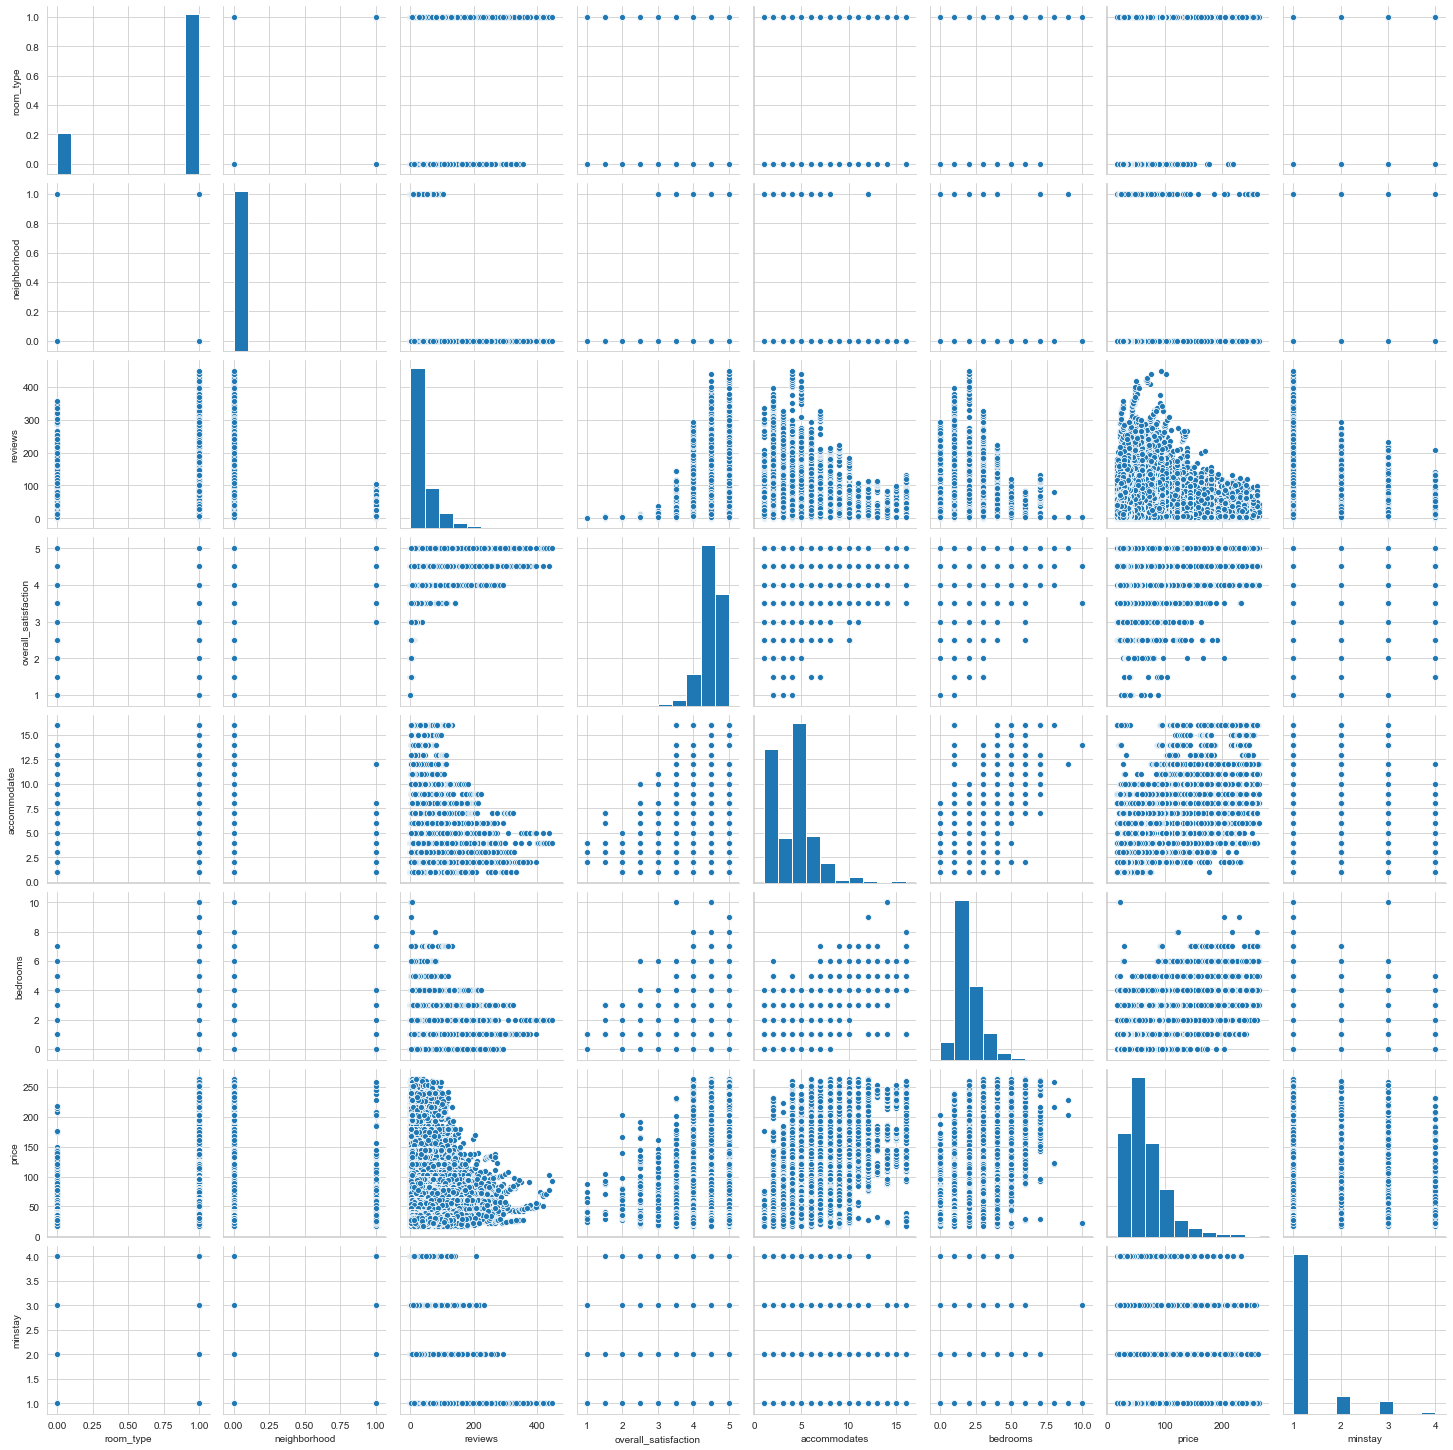

In [8]:
sns.pairplot(data)

## Data Visualization

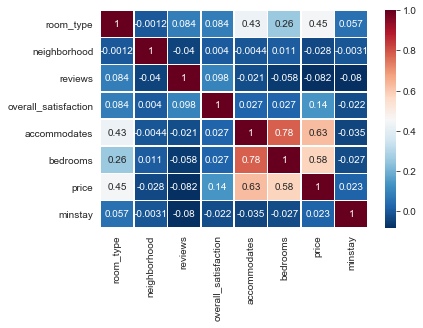

In [9]:
sns.heatmap(data.corr(),cmap='RdBu_r',annot=True,linewidth=0.5)
plt.show()

In [10]:
data.corr(method ='pearson') 

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay
room_type,1.000000,-0.001229,0.083857,0.083515,0.427446,0.258731,0.448421,0.056501
neighborhood,-0.001229,1.000000,-0.040167,0.003998,-0.004380,0.010690,-0.027796,-0.003148
reviews,0.083857,-0.040167,1.000000,0.097693,-0.020725,-0.057636,-0.081919,-0.079925
overall_satisfaction,0.083515,0.003998,0.097693,1.000000,0.027426,0.026920,0.141830,-0.022495
accommodates,0.427446,-0.004380,-0.020725,0.027426,1.000000,0.782491,0.627894,-0.035439
bedrooms,0.258731,0.010690,-0.057636,0.026920,0.782491,1.000000,0.579558,-0.026591
price,0.448421,-0.027796,-0.081919,0.141830,0.627894,0.579558,1.000000,0.023364
minstay,0.056501,-0.003148,-0.079925,-0.022495,-0.035439,-0.026591,0.023364,1.000000


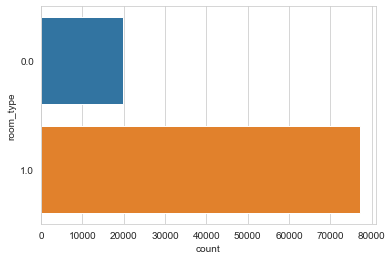

In [11]:
sns.countplot(y='room_type',data=data)
plt.show()

In [12]:
data['room_type'].value_counts()

1.0    77150
0.0    19754
Name: room_type, dtype: int64

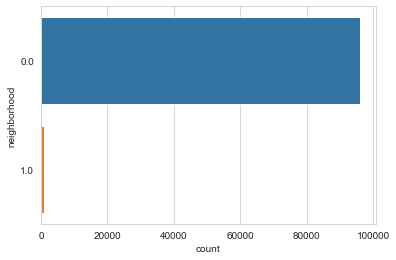

In [13]:
sns.countplot(y='neighborhood',data=data)

In [14]:
data['neighborhood'].value_counts()

0.0    96077
1.0      827
Name: neighborhood, dtype: int64

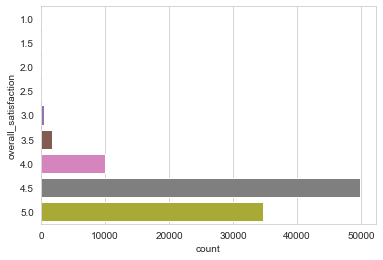

In [15]:
sns.countplot(y='overall_satisfaction',data=data)

In [16]:
data['overall_satisfaction'].value_counts()

4.5    49824
5.0    34747
4.0     9949
3.5     1729
3.0      472
2.5      112
2.0       49
1.0       12
1.5       10
Name: overall_satisfaction, dtype: int64

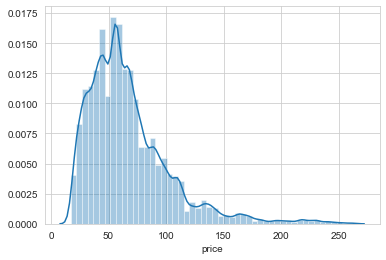

In [17]:
sns.distplot(data['price'])

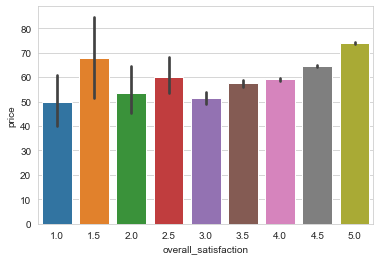

In [18]:
sns.barplot(x=data.overall_satisfaction,y=data.price)

## Linear Regression

In [19]:
y = data['price']
x = data

In [20]:
dataFrame = x
x = x.drop('price',axis=1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
room_type,21.940168
neighborhood,-12.490831
reviews,-0.077593
overall_satisfaction,10.904467
accommodates,5.616551
bedrooms,10.514688
minstay,1.325308


In [24]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1

,Actual,Predicted
36476,162.0,144.607767
101972,110.0,76.249745
144672,54.0,32.406601
66271,55.0,89.986561
104178,78.0,95.728414
40895,56.0,51.765462
102674,96.0,79.207396
103498,75.0,84.340127
78024,61.0,114.991425
91533,55.0,50.834351


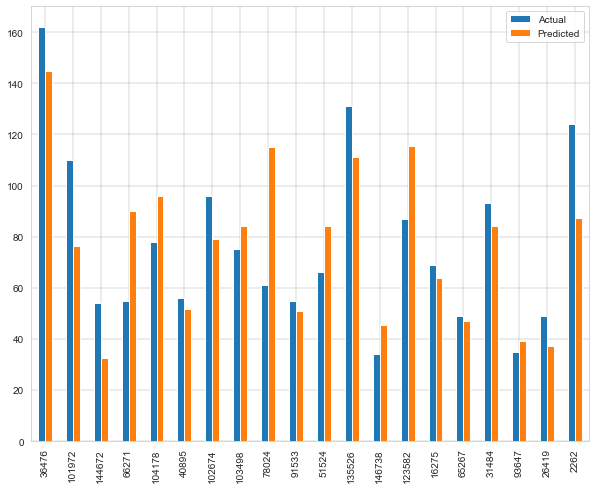

In [25]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
plt.show()

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.559050026435113
Mean Squared Error: 707.8370238932661
Root Mean Squared Error: 26.605206706456276


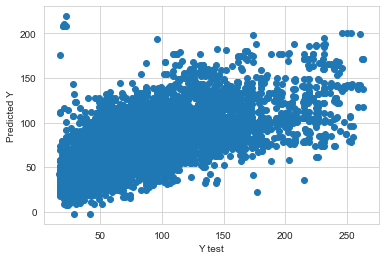

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

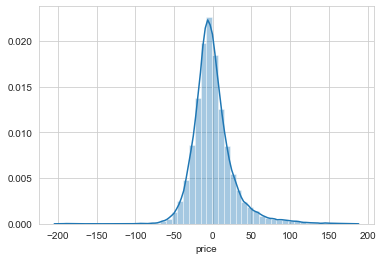

In [28]:
sns.distplot((y_test-y_pred), bins=50)

## Quadratic Regression

In [29]:
regressor = make_pipeline(PolynomialFeatures(2), LinearRegression()) 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

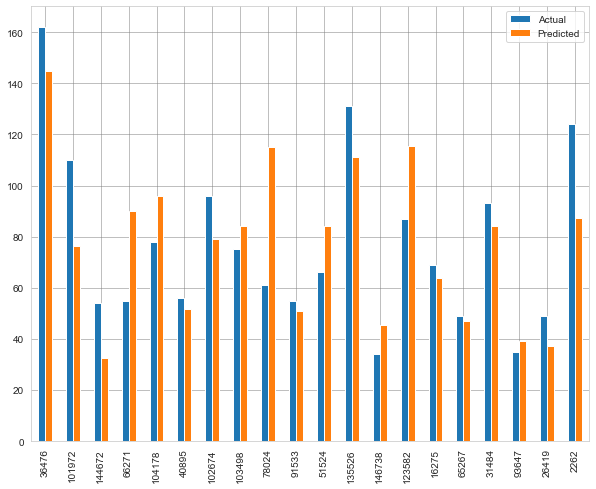

In [30]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.027945453279557
Mean Squared Error: 677.7216969331704
Root Mean Squared Error: 26.033088501619826


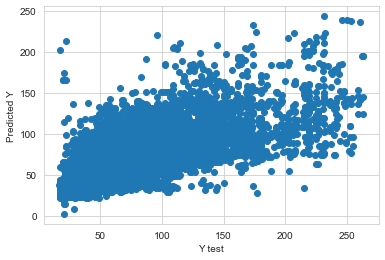

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()